<span style="font-size:40px; font-weight:bold;">EV Market Segmentation Strategy</span>


## 📌 Project Objectives
The goal of this project is to analyze the Indian Electric Vehicle (EV) market and identify potential customer segments. This study will help an EV startup determine the best strategies for launching EVs by understanding consumer behavior, income levels, and transport spending.

## Understanding the Problem Statement
The Indian EV market is growing rapidly, but adoption rates vary based on demographics, geography, and economic factors. By leveraging data-driven insights, we can pinpoint the right customers, set appropriate pricing strategies, and define business models for different segments.

## Business Benefits
- **Targeted Market Entry** – Identify high-potential cities for EV adoption.
- **Pricing Strategy** – Understand affordability across income groups.
- **Customer Segmentation** – Develop EV models suited for different consumer needs.
- **Strategic Positioning** – Define competitive advantage in the growing EV market.


In [1]:
## Data Understanding & Preprocessing

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Aparna Mondal\Downloads\data (1).csv")

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,4982.878416,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,7733.468188,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.000000,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973
25%,1.760488e+04,29.000000,1.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,581.632906,...,1224.932636,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,1020.198376,...,2155.356763,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257
75%,5.176545e+04,53.000000,3.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104082,...,6216.309609,13331.950716,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981
max,1.079728e+06,64.000000,4.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,38667.368308,...,245504.485208,377060.218482,34894.644404,12273.258242,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137


In [4]:
df.loc[:, "Spending"] = df["Income"] - df["Desired_Savings"] - df["Disposable_Income"]

In [5]:
import numpy as np

# Define IQR
Q1 = df["Spending"].quantile(0.25)
Q3 = df["Spending"].quantile(0.75)
IQR = Q3 - Q1

# Set limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values
df["Spending"] = np.where(df["Spending"] < lower_bound, lower_bound, df["Spending"])
df["Spending"] = np.where(df["Spending"] > upper_bound, upper_bound, df["Spending"])

print("Outliers capped instead of removed.")

Outliers capped instead of removed.


In [6]:
df = df.copy()  # Ensure df is a standalone DataFrame
df["Spending"] = df["Income"] - df["Desired_Savings"] - df["Disposable_Income"]
df["Spending_Log"] = np.log1p(df["Spending"])


In [7]:
import numpy as np

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for relevant columns
columns_to_check = ["Transport", "Spending", "Income"]  # Replace with your relevant numerical columns
for col in columns_to_check:
    df = remove_outliers_iqr(df, col)

print("Outliers removed successfully.")


Outliers removed successfully.


In [8]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05)  # Adjust contamination level
outliers = iso.fit_predict(df[["Spending"]])

df["Outlier_Flag"] = outliers  # -1 = Outlier, 1 = Normal
df_no_outliers = df[df["Outlier_Flag"] == 1]


In [9]:
print(df["Outlier_Flag"].value_counts())  # -1 = Outlier, 1 = Normal


Outlier_Flag
 1    16915
-1      885
Name: count, dtype: int64


In [10]:
df_no_outliers = df[df["Outlier_Flag"] == 1].drop(columns=["Outlier_Flag"])  # Keeping only normal data


In [11]:
# Display first few rows
display(df.head())

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Spending,Spending_Log,Outlier_Flag
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517,27171.084736,10.209945,1
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606,15258.601425,9.632964,1
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422,29425.794038,10.289661,1
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076,16735.483582,9.725346,1
5,24875.610267,57,4,Self_Employed,Tier_2,4975.122053,0.000000,1038.230996,3250.067756,1760.164812,...,521.683848,135.925865,148.952326,86.567256,13.143683,33.961843,96.675925,15797.678609,9.667682,1


In [12]:
print("Missing Values per Column:\n", df.isnull().sum())

Missing Values per Column:
 Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_

In [13]:
drop_cols = ['ID', 'Timestamp']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])
print("Updated Columns:", df.columns)

Updated Columns: Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous', 'Spending', 'Spending_Log',
       'Outlier_Flag'],
      dtype='object')


In [14]:
## 💰 Strategic Pricing Analysis: Understanding Affordability
# Define income groups
income_bins = [0, 30000, 80000, 150000, 500000]
income_labels = ["Low", "Mid", "Upper-Mid", "High"]
df["Income_Group"] = pd.cut(df["Income"], bins=income_bins, labels=income_labels)


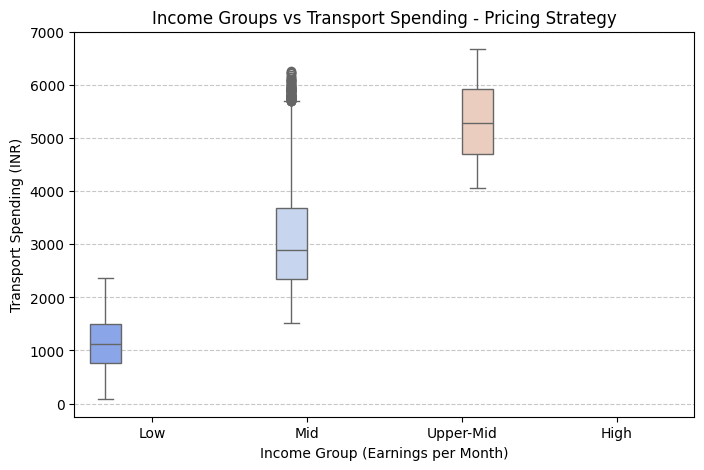

In [15]:
# Visualization: Income Groups vs Transport Spending
plt.figure(figsize=(8,5))
sns.boxplot(x="Income_Group", y="Transport", data=df, hue="Income_Group", palette="coolwarm", legend=False)
plt.xlabel("Income Group (Earnings per Month)")
plt.ylabel("Transport Spending (INR)")
plt.title("Income Groups vs Transport Spending - Pricing Strategy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [16]:
# Function to preprocess dataset
def preprocess_data(df):
    print("\nDataset Overview:")
    print(df.head())  

    print("\nDataset Info:")
    df.info()

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Handling missing values (Fill numeric columns with median)
    df.fillna(df.median(numeric_only=True), inplace=True)

    # Identifying categorical and numerical columns
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

    print("\nCategorical Variables:", categorical_columns)
    print("\nNumerical Variables:", numerical_columns)

    # Encoding categorical variables using LabelEncoder
    le = LabelEncoder()
    for col in categorical_columns:
        df[col] = le.fit_transform(df[col].astype(str))

    # Scaling numerical data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[numerical_columns])

    # Convert scaled data back to DataFrame
    df_scaled = pd.DataFrame(df_scaled, columns=numerical_columns)

    return df, df_scaled, numerical_columns

# Load dataset
file_path = (r"C:\Users\Aparna Mondal\Downloads\data (1).csv")  # Change the filename accordingly
df = pd.read_csv(file_path)

# Preprocessing dataset
df_processed, df_scaled, numerical_columns = preprocess_data(df)

# Display first few rows of scaled data
print("\nFirst 5 rows of Scaled Data:")
print(df_scaled.head())



Dataset Overview:
          Income  Age  Dependents     Occupation City_Tier          Rent  \
0   44637.249636   49           0  Self_Employed    Tier_1  13391.174891   
1   26858.596592   34           2        Retired    Tier_2   5371.719318   
2   50367.605084   35           1        Student    Tier_3   7555.140763   
3  101455.600247   21           0  Self_Employed    Tier_3  15218.340037   
4   24875.283548   52           4   Professional    Tier_2   4975.056710   

   Loan_Repayment    Insurance     Groceries    Transport  ...  \
0        0.000000  2206.490129   6658.768341  2636.970696  ...   
1        0.000000   869.522617   2818.444460  1543.018778  ...   
2     4612.103386  2201.800050   6313.222081  3221.396403  ...   
3     6809.441427  4889.418087  14690.149363  7106.130005  ...   
4     3112.609398   635.907170   3034.329665  1276.155163  ...   

   Desired_Savings  Disposable_Income  Potential_Savings_Groceries  \
0      6200.537192       11265.627707                  16

NameError: name 'LabelEncoder' is not defined

In [17]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Apply StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)

print("df_scaled is now created!")


df_scaled is now created!


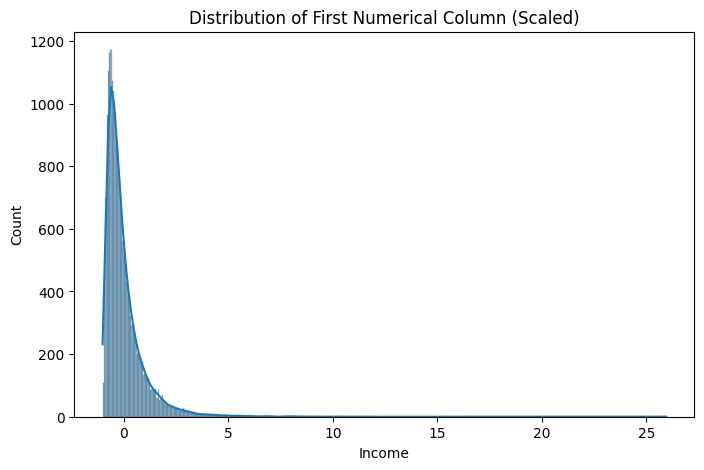

In [18]:
# Check distribution of a numerical column
plt.figure(figsize=(8, 5))
sns.histplot(df_scaled[numerical_columns[0]], kde=True)
plt.title("Distribution of First Numerical Column (Scaled)")
plt.show()

In [19]:
# Check data types of all columns
print(df.dtypes)

# Find columns that are 'object' type (categorical)
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Income                             float64
Age                                  int64
Dependents                           int64
Occupation                          object
City_Tier                           object
Rent                               float64
Loan_Repayment                     float64
Insurance                          float64
Groceries                          float64
Transport                          float64
Eating_Out                         float64
Entertainment                      float64
Utilities                          float64
Healthcare                         float64
Education                          float64
Miscellaneous                      float64
Desired_Savings_Percentage         float64
Desired_Savings                    float64
Disposable_Income                  float64
Potential_Savings_Groceries        float64
Potential_Savings_Transport        float64
Potential_Savings_Eating_Out       float64
Potential_Savings_Entertainment    float64
Potential_S

In [20]:
df_encoded = pd.get_dummies(df, drop_first=True)


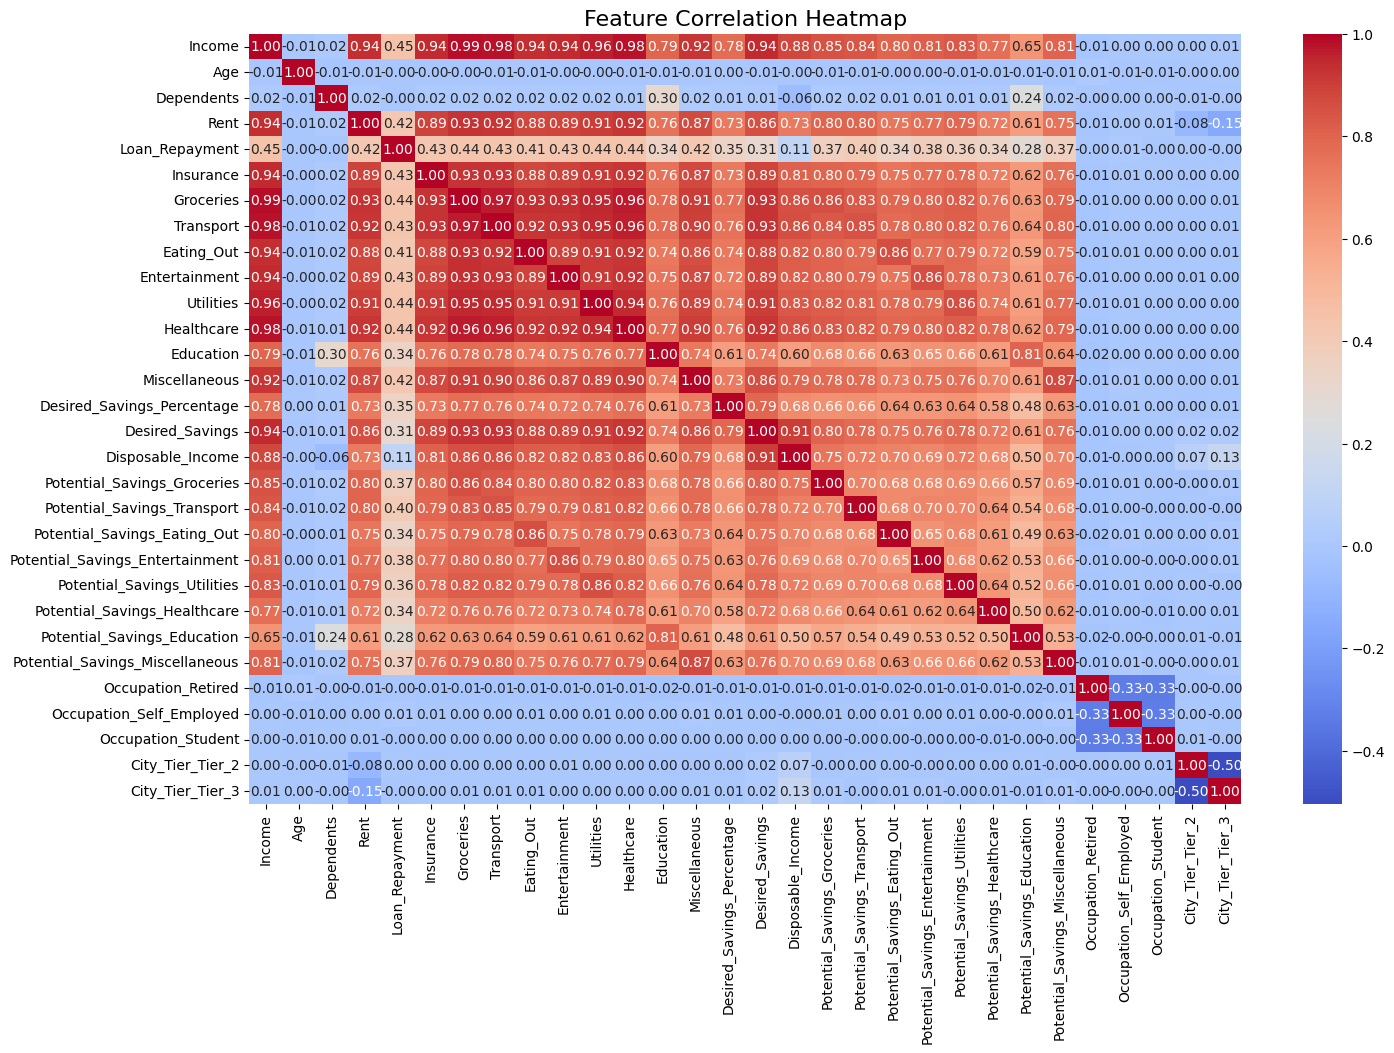

In [21]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


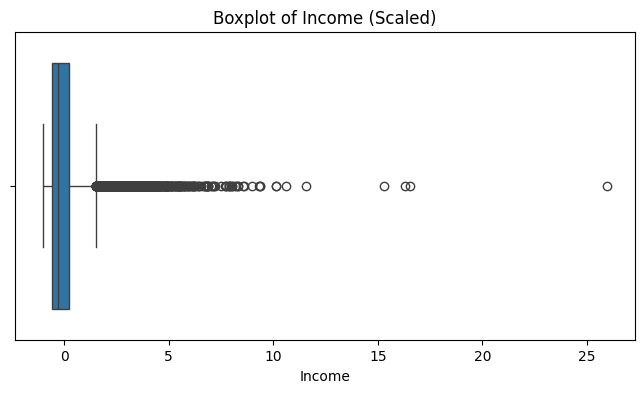

In [22]:
plt.figure(figsize=(8,4)) # Boxplot to check outliers in a numerical colum
sns.boxplot(x=df_scaled[numerical_columns[0]])
plt.title(f"Boxplot of {numerical_columns[0]} (Scaled)")
plt.show()

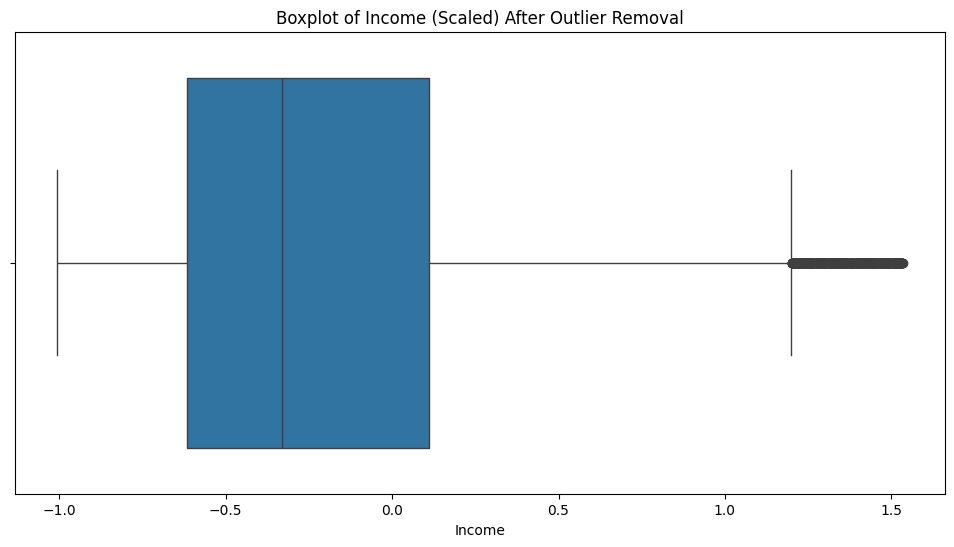

In [23]:
Q1 = df_scaled[numerical_columns[0]].quantile(0.25)
Q3 = df_scaled[numerical_columns[0]].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df_scaled[(df_scaled[numerical_columns[0]] >= lower_bound) & (df_scaled[numerical_columns[0]] <= upper_bound)]

# Replot without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtered[numerical_columns[0]])
plt.title(f"Boxplot of {numerical_columns[0]} (Scaled) After Outlier Removal")
plt.show()

In [24]:
df_scaled['Income'] = np.log1p(df_scaled['Income'])

C:\Users\Aparna Mondal\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
print(df_scaled['Income'].describe())  # Check min value
print(df_scaled['Income'][df_scaled['Income'] < 0])  # See negative values

count    19996.000000
mean        -0.360804
std          0.871078
min         -6.417591
25%         -0.913848
50%         -0.335111
75%          0.226714
max          3.293790
Name: Income, dtype: float64
1       -0.458942
4       -0.540622
5       -0.540608
8       -0.742950
10      -0.737706
           ...   
19989   -0.693908
19991   -0.742245
19995   -0.016938
19997   -0.024820
19999   -1.796514
Name: Income, Length: 13145, dtype: float64


In [26]:
min_value = df_scaled['Income'].min()
if min_value < 0:
    df_scaled['Income'] = np.log1p(df_scaled['Income'] - min_value + 1)  # Shift and transform
else:
    df_scaled['Income'] = np.log1p(df_scaled['Income'])  # Normal transformation

In [27]:
df_scaled['Income'] = df_scaled['Income'].fillna(df_scaled['Income'].median())

In [28]:
df_scaled['Income'] = np.sqrt(df_scaled['Income'] - df_scaled['Income'].min() + 1)

count    20000.000000
mean         1.544643
std          0.036684
min          1.000000
25%          1.523904
50%          1.548080
75%          1.569633
max          1.663555
Name: Income, dtype: float64


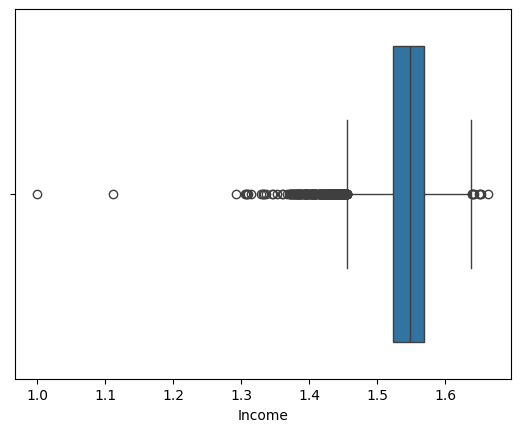

In [29]:
print(df_scaled['Income'].describe())  # Check min, max, and NaNs
sns.boxplot(x=df_scaled['Income'])  # Replot after transformation
plt.show()


In [30]:
Q1 = df_scaled['Income'].quantile(0.25)
Q3 = df_scaled['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_scaled[(df_scaled['Income'] < lower_bound) | (df_scaled['Income'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")

Number of Outliers: 362


In [31]:
df_scaled = df_scaled[(df_scaled['Income'] >= lower_bound) & (df_scaled['Income'] <= upper_bound)]

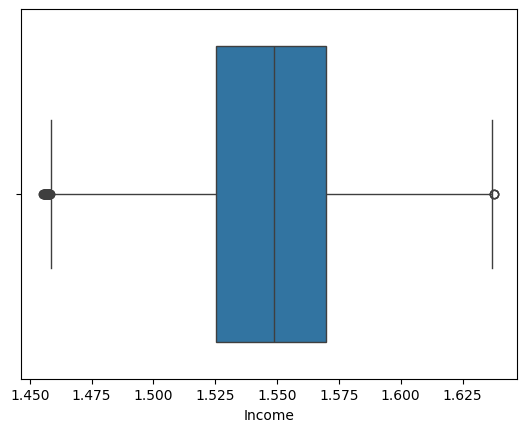

In [32]:

sns.boxplot(x=df_scaled['Income'])
plt.show()


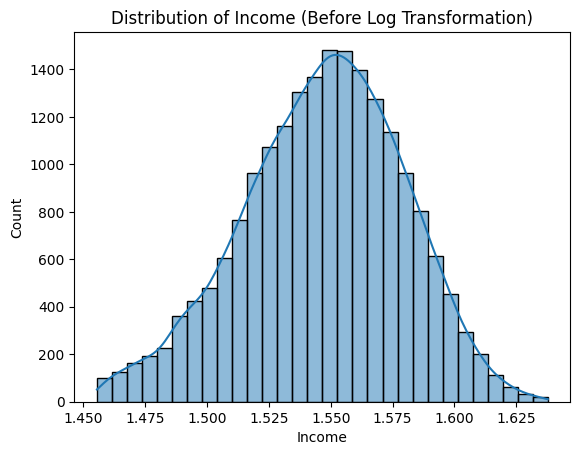

In [33]:
sns.histplot(df_scaled['Income'], bins=30, kde=True)
plt.title('Distribution of Income (Before Log Transformation)')
plt.show()

In [34]:
print(df_scaled['Income'].skew())

-0.24529011296331446


Number of outliers removed: 0


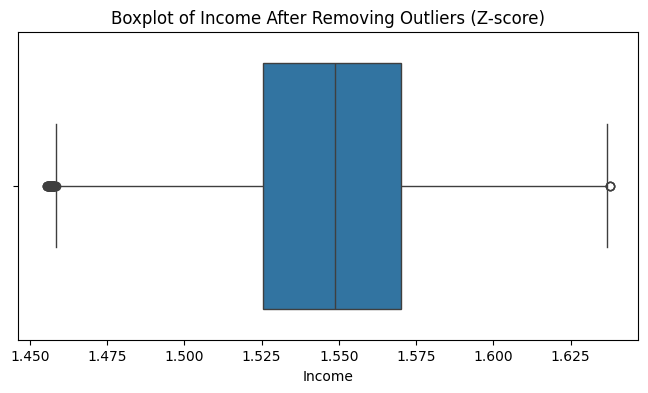

In [35]:
from scipy import stats
import numpy as np

# Compute Z-scores for the 'Income' column
df_scaled['Z_score'] = np.abs(stats.zscore(df_scaled['Income']))

# Define threshold (commonly 3)
threshold = 3

# Remove outliers
df_filtered = df_scaled[df_scaled['Z_score'] < threshold].drop(columns=['Z_score'])

# Display the number of removed outliers
num_outliers_removed = df_scaled.shape[0] - df_filtered.shape[0]
print(f"Number of outliers removed: {num_outliers_removed}")

# Boxplot to visualize after removal
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_filtered['Income'])
plt.title("Boxplot of Income After Removing Outliers (Z-score)")
plt.show()

In [36]:
threshold = 2.5  # Lowering threshold
df_filtered = df_scaled[df_scaled['Z_score'] < threshold].drop(columns=['Z_score'])

In [37]:
print(df_scaled['Income'].describe())

count    19638.000000
mean         1.546790
std          0.032631
min          1.455446
25%          1.525363
50%          1.548683
75%          1.569990
max          1.637778
Name: Income, dtype: float64


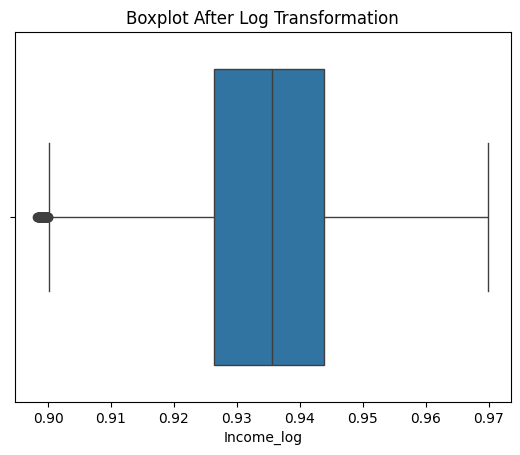

In [38]:
df_scaled['Income_log'] = np.log1p(df_scaled['Income'])
sns.boxplot(x=df_scaled['Income_log'])
plt.title("Boxplot After Log Transformation")
plt.show()

In [39]:
print(df.columns)  # Check all available column names

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')


In [40]:
import numpy as np

df['Income_log'] = np.log(df['Income'])  # Applying log transformation

In [41]:
from scipy.stats import skew

print("Skewness before log transform:", skew(df['Income']))
print("Skewness after log transform:", skew(df['Income_log']))

Skewness before log transform: 4.232485511284107
Skewness after log transform: -0.0030900867502949877


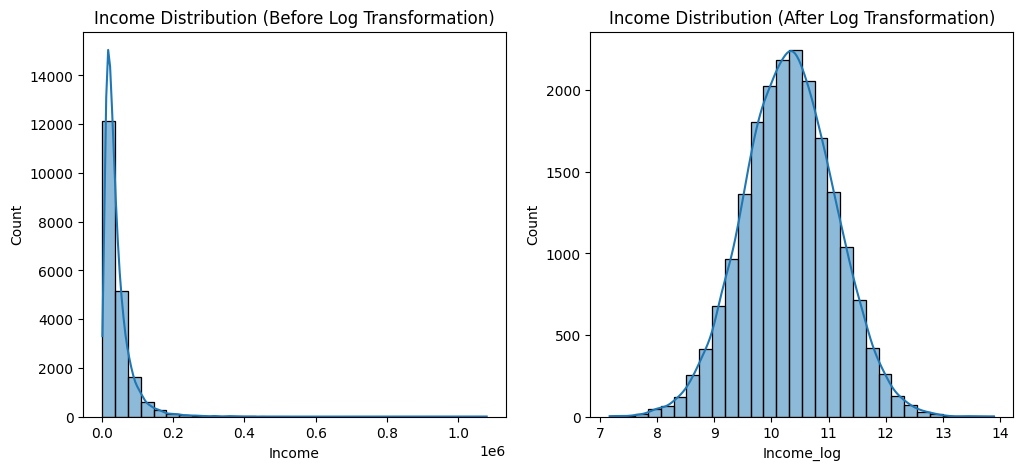

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Income'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Income Distribution (Before Log Transformation)')

# After transformation
sns.histplot(df['Income_log'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Income Distribution (After Log Transformation)')

plt.show()

In [43]:
print(df.dtypes)


Income                             float64
Age                                  int64
Dependents                           int64
Occupation                          object
City_Tier                           object
Rent                               float64
Loan_Repayment                     float64
Insurance                          float64
Groceries                          float64
Transport                          float64
Eating_Out                         float64
Entertainment                      float64
Utilities                          float64
Healthcare                         float64
Education                          float64
Miscellaneous                      float64
Desired_Savings_Percentage         float64
Desired_Savings                    float64
Disposable_Income                  float64
Potential_Savings_Groceries        float64
Potential_Savings_Transport        float64
Potential_Savings_Eating_Out       float64
Potential_Savings_Entertainment    float64
Potential_S

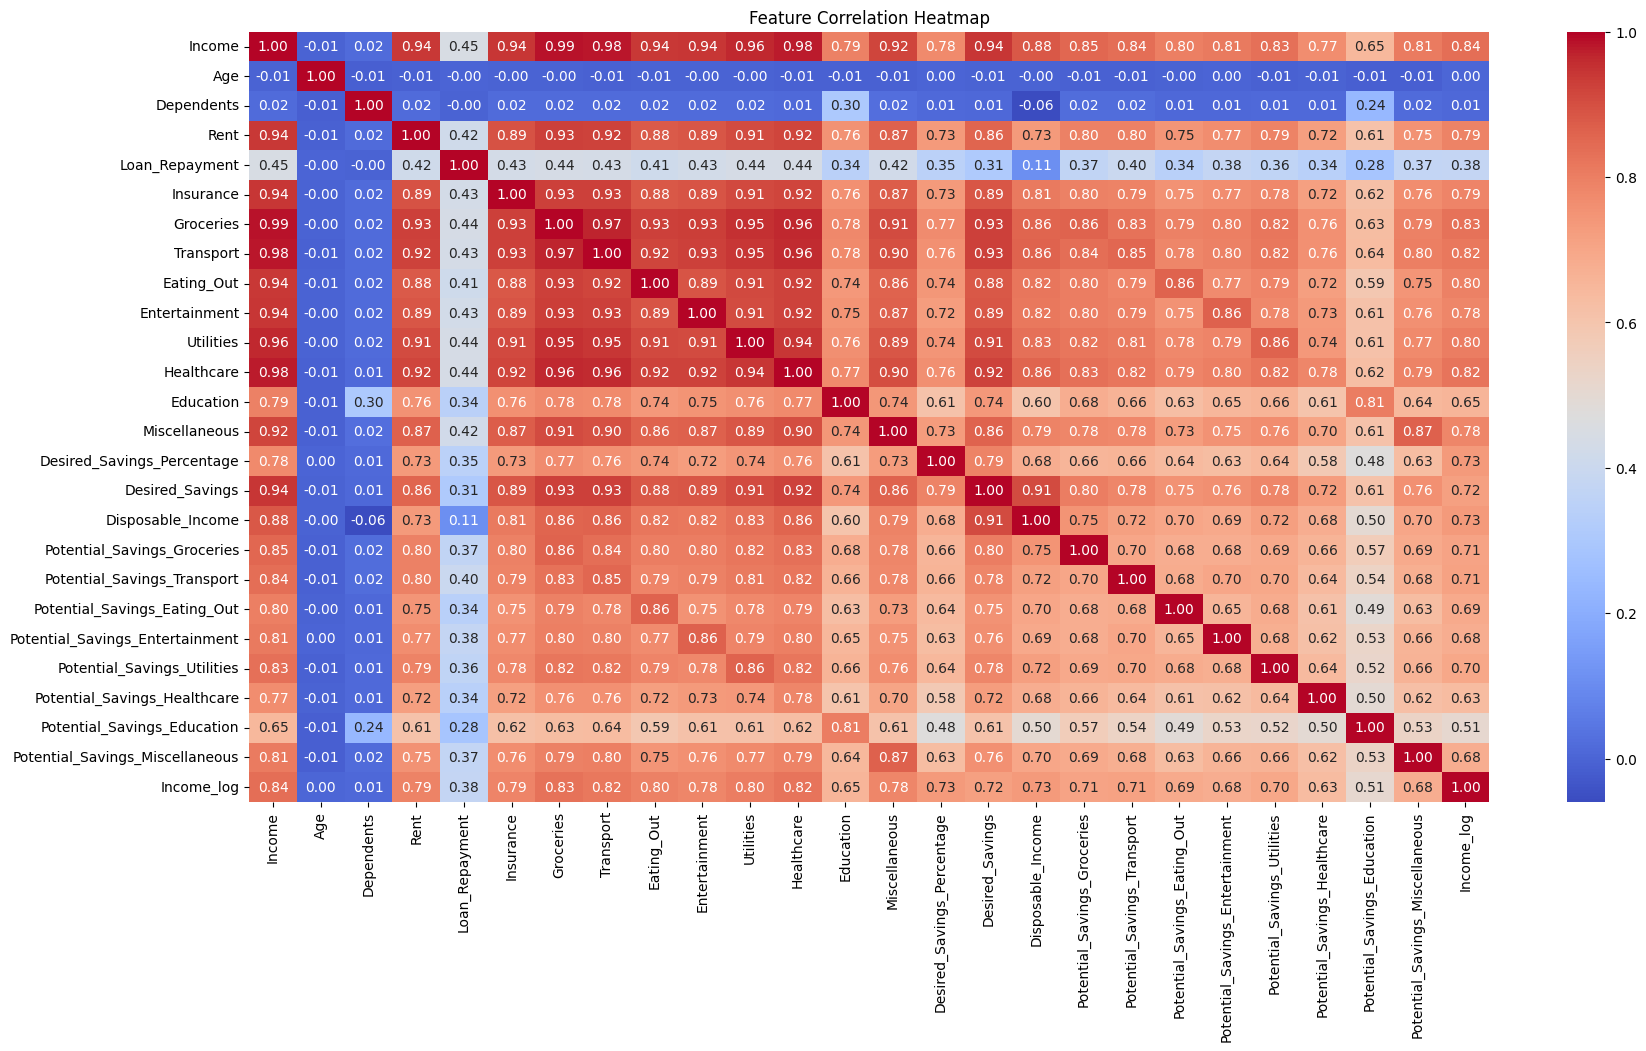

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])  

plt.figure(figsize=(20,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [45]:
features = ['Income_log', 'Age', 'Disposable_Income', 'Desired_Savings']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

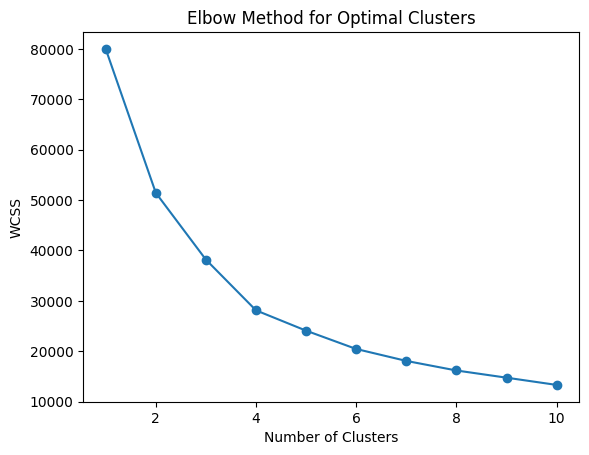

In [46]:
from sklearn.cluster import KMeans

# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [47]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Segment'] = kmeans.fit_predict(df_scaled)

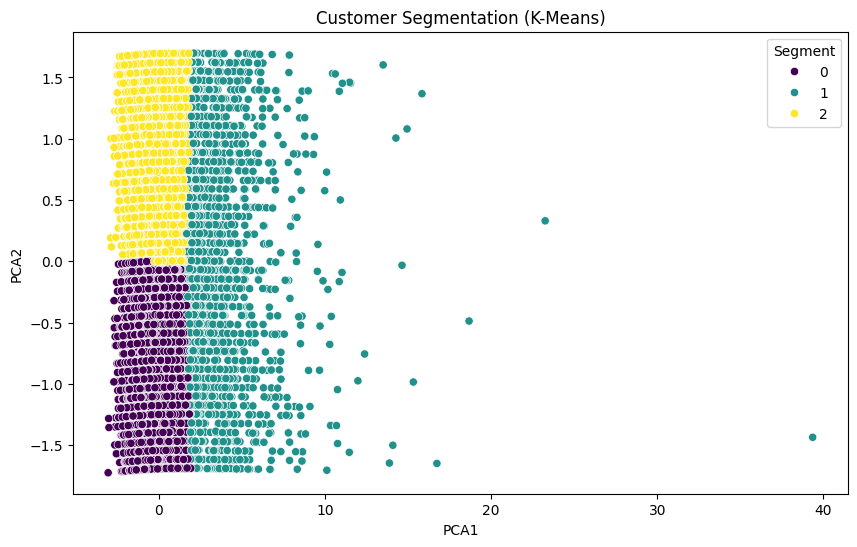

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)
df['PCA1'] = reduced_data[:,0]
df['PCA2'] = reduced_data[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Segment'], palette='viridis', data=df)
plt.title('Customer Segmentation (K-Means)')
plt.show()


In [49]:
# Select only numeric columns for aggregation
numeric_cols = df.select_dtypes(include=['number']).columns

# Group by 'Segment' and calculate the mean only for numeric columns
segment_profile = df.groupby('Segment')[numeric_cols].mean()

# Display the profile of each segment
print(segment_profile)


                Income        Age  Dependents          Rent  Loan_Repayment  \
Segment                                                                       
0         31893.982605  29.209210    2.013837   7112.060483     1796.744677   
1        130765.316805  40.954955    1.955485  27439.851145     4641.610993   
2         32693.637010  52.810992    1.986562   7300.422851     1762.913810   

           Insurance     Groceries    Transport   Eating_Out  Entertainment  \
Segment                                                                       
0        1113.676509   4011.095334  2072.772580  1123.480018    1115.494207   
1        4571.434006  16258.365399  8485.529864  4592.415491    4524.592670   
2        1146.968351   4097.100903  2131.480489  1147.894385    1141.292226   

         ...  Potential_Savings_Eating_Out  Potential_Savings_Entertainment  \
Segment  ...                                                                  
0        ...                    196.280927        

C:\Users\Aparna Mondal\AppData\Local\Temp\ipykernel_8424\1797520127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Income', data=df, palette="Set2")


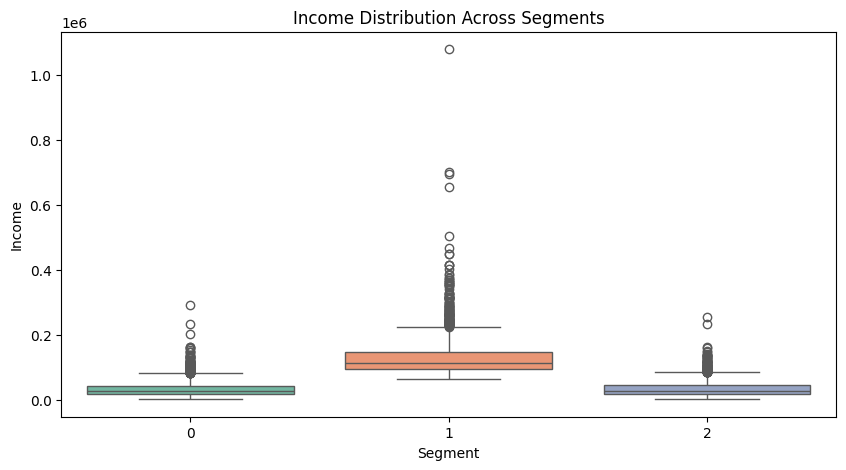

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Segment', y='Income', data=df, palette="Set2")
plt.title("Income Distribution Across Segments")
plt.xlabel("Segment")
plt.ylabel("Income")
plt.show()


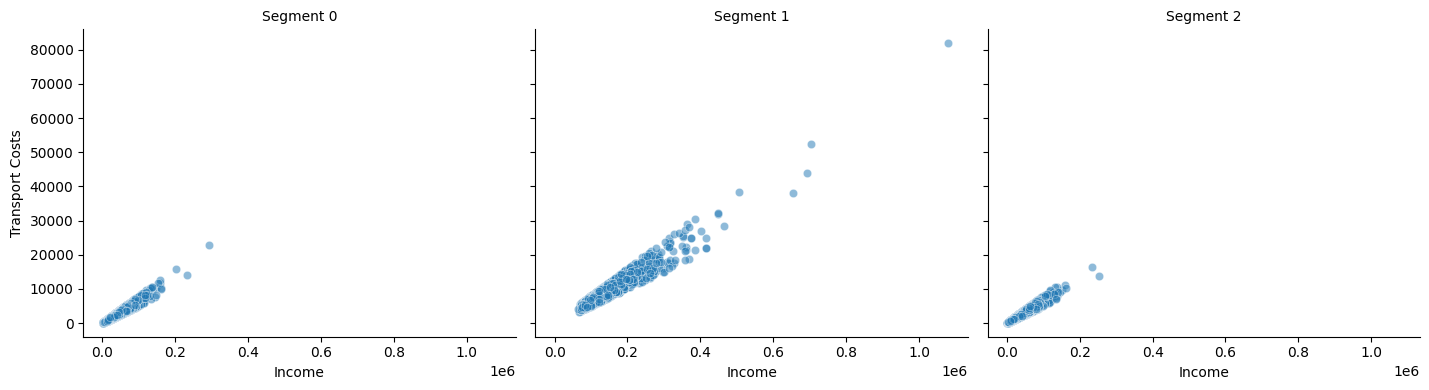

In [51]:
g = sns.FacetGrid(df, col="Segment", height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x="Income", y="Transport", alpha=0.5)
g.set_axis_labels("Income", "Transport Costs")
g.set_titles("Segment {col_name}")
plt.show()

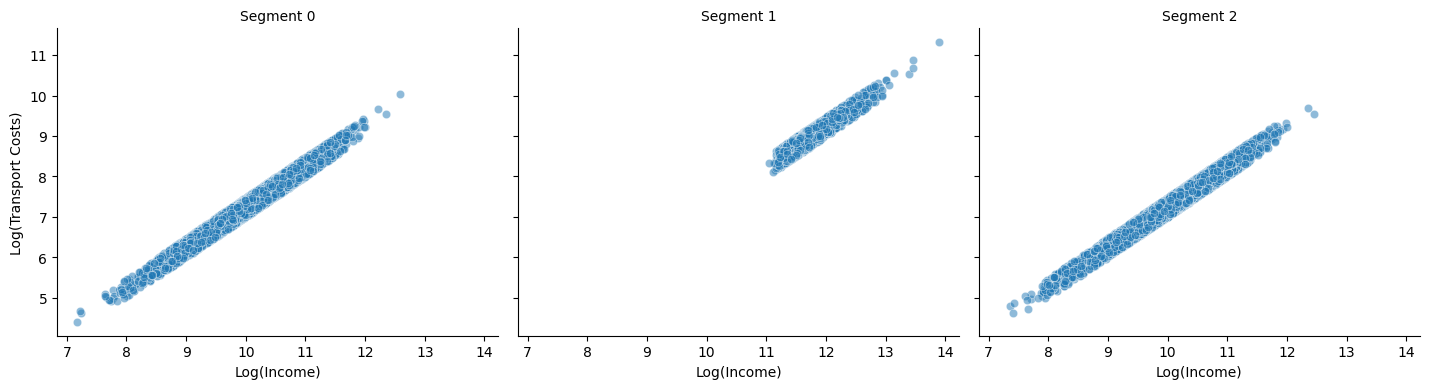

In [52]:
import numpy as np

df["log_Income"] = np.log1p(df["Income"])  # log(Income + 1) to handle zero values
df["log_Transport"] = np.log1p(df["Transport"])

g = sns.FacetGrid(df, col="Segment", height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x="log_Income", y="log_Transport", alpha=0.5)
g.set_axis_labels("Log(Income)", "Log(Transport Costs)")
g.set_titles("Segment {col_name}")
plt.show()

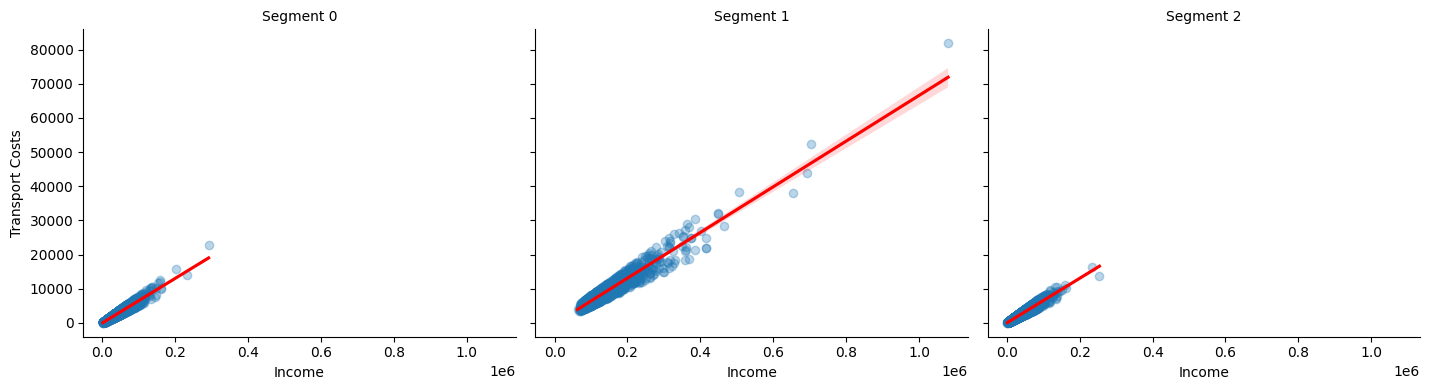

In [53]:
import seaborn as sns

g = sns.FacetGrid(df, col="Segment", height=4, aspect=1.2)
g.map_dataframe(sns.regplot, x="Income", y="Transport", scatter_kws={"alpha":0.3}, line_kws={"color": "red"})
g.set_axis_labels("Income", "Transport Costs")
g.set_titles("Segment {col_name}")
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for segment in df["Segment"].unique():
    df_seg = df[df["Segment"] == segment]
    model = LinearRegression()
    model.fit(df_seg[["Income"]], df_seg["Transport"])
    r2 = r2_score(df_seg["Transport"], model.predict(df_seg[["Income"]]))
    print(f"Segment {segment}: R² = {r2:.3f}")

Segment 2: R² = 0.942
Segment 0: R² = 0.943
Segment 1: R² = 0.918


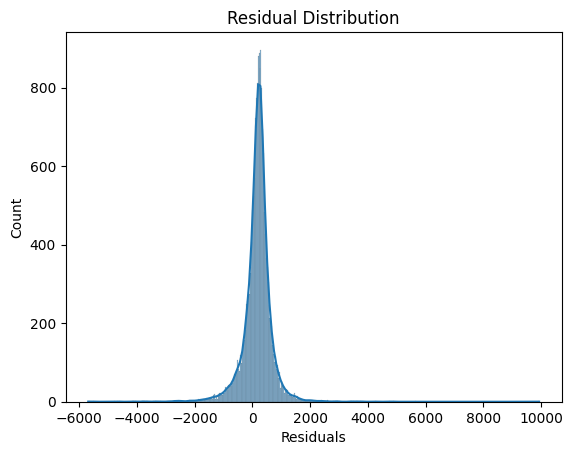

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Prediction"] = df["Income"] * model.coef_[0] + model.intercept_
df["Residuals"] = df["Transport"] - df["Prediction"]

sns.histplot(df["Residuals"], kde=True)
plt.title("Residual Distribution")
plt.show()


In [56]:
from numpy.polynomial.polynomial import Polynomial

poly_model = Polynomial.fit(df["Income"], df["Transport"], deg=2)
print(poly_model)

36575.37249539 + 38642.58558908 x + 2187.28477611 x**2


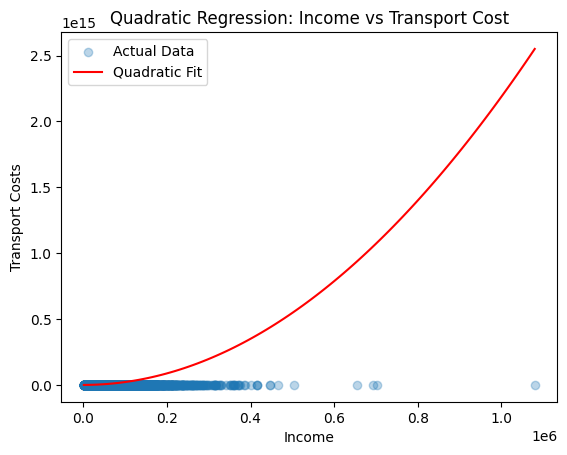

In [57]:
# Generate x values (Income range)
x = np.linspace(df["Income"].min(), df["Income"].max(), 100)
y = 36575.37 + 38642.59*x + 2187.28*(x**2)

# Scatter Plot
plt.scatter(df["Income"], df["Transport"], alpha=0.3, label="Actual Data")
plt.plot(x, y, color="red", label="Quadratic Fit")
plt.xlabel("Income")
plt.ylabel("Transport Costs")
plt.legend()
plt.title("Quadratic Regression: Income vs Transport Cost")
plt.show()

In [58]:
df["Log_Income"] = np.log(df["Income"])  # Log transformation
model = LinearRegression()
model.fit(df[["Log_Income"]], df["Transport"])


LinearRegression()

In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)  # Try degree 3 or 4
X_poly = poly.fit_transform(df[["Income"]])

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[["Income"]], df["Transport"], test_size=0.2, random_state=42)

In [61]:
import sklearn
print(sklearn.__version__)

1.6.1


In [62]:
pip install --upgrade scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [64]:
TARGET_COLUMN = 'Your_Actual_Target_Column_Name'  # Replace with actual name


In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

def preprocess_data(df):
    df.fillna(df.median(numeric_only=True), inplace=True)  # Handle missing values

    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

    # Encoding categorical variables
    le = LabelEncoder()
    for col in categorical_columns:
        df[col] = le.fit_transform(df[col].astype(str))

    # Scaling numerical data
    scaler = StandardScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    return df, numerical_columns

# Load or define DataFrame
df = pd.read_csv(r"C:\Users\Aparna Mondal\Downloads\data (1).csv")  # Replace with your actual data source

df_processed, numerical_columns = preprocess_data(df)

# Define the target column correctly
TARGET_COLUMN = 'Your_Actual_Target_Column_Name'  # Replace with actual name

if TARGET_COLUMN in df_processed.columns:
    X = df_processed[numerical_columns].drop(columns=[TARGET_COLUMN], errors='ignore')
    y = df_processed[TARGET_COLUMN]

    # Splitting dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training Linear Regression model
    model_poly = LinearRegression()
    model_poly.fit(X_train, y_train)

    # Predictions
    y_pred = model_poly.predict(X_test)

    # Model Evaluation
    print("R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)
else:
    print(f"Error: Target column '{TARGET_COLUMN}' not found in dataset.")


Error: Target column 'Your_Actual_Target_Column_Name' not found in dataset.


In [66]:
y = df_processed.get('Target_Column')  # Replace with actual target column name

In [67]:
y = df_processed.get('Segment')  # OR
y = df_processed.get('Cluster_Label')


In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [69]:
selected_features = ["Income", "Age", "Transport", "Groceries"]  # Select relevant feature columns from your dataset

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_features])  

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Calculate Silhouette Score
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, kmeans.labels_)

print("Silhouette Score:", sil_score)  


Silhouette Score: 0.40980675525309096


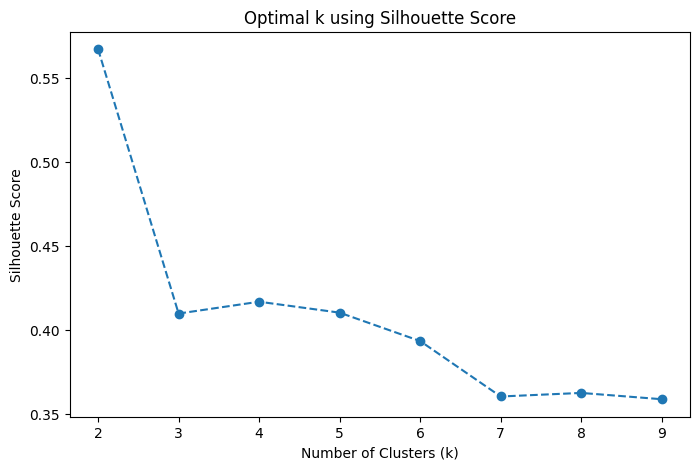

In [70]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
K = range(2, 10)  # Test k values from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)

# Plot Silhouette Score vs. Number of Clusters
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Optimal k using Silhouette Score')
plt.show()


In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[selected_features])  # Rescale features

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Run KMeans on reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

sil_score = silhouette_score(X_pca, kmeans.labels_)
print("Silhouette Score after PCA:", sil_score)

Silhouette Score after PCA: 0.5326313078682056


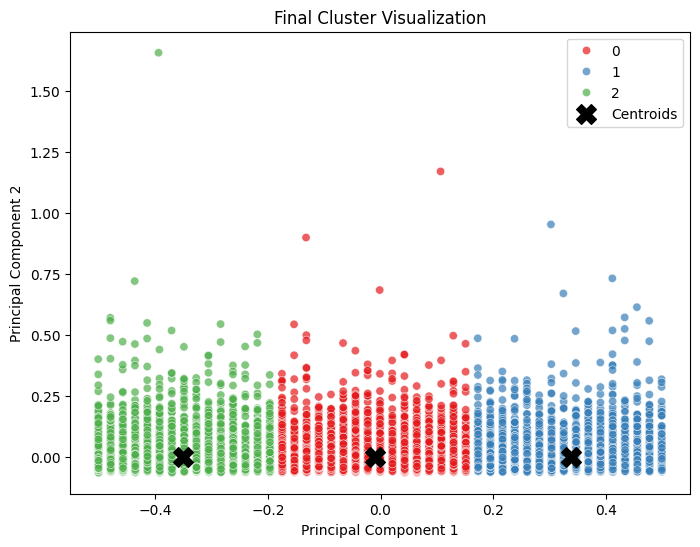

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette="Set1", alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Final Cluster Visualization")
plt.legend()
plt.show()


In [84]:
df['Cluster_Label'] = kmeans.labels_
print(df['Cluster_Label'].value_counts())

Cluster_Label
0    6924
1    6761
2    6315
Name: count, dtype: int64


In [85]:
cluster_summary = df.groupby("Cluster_Label").mean()
print(cluster_summary)


                 Income       Age  Dependents  Occupation  City_Tier  \
Cluster_Label                                                          
0              0.003270 -0.033279    0.013351    1.478192   0.898902   
1             -0.005569  1.144993   -0.017593    1.495489   0.908593   
2              0.002377 -1.189371    0.004197    1.522724   0.902138   

                   Rent  Loan_Repayment  Insurance  Groceries  Transport  ...  \
Cluster_Label                                                             ...   
0              0.005940        0.002709   0.004103   0.005043   0.004037  ...   
1             -0.009822        0.001271  -0.003936  -0.005744  -0.007837  ...   
2              0.004003       -0.004331  -0.000284   0.000620   0.003965  ...   

               Potential_Savings_Groceries  Potential_Savings_Transport  \
Cluster_Label                                                             
0                                 0.010492                     0.012662   
1       

In [86]:
from sklearn.cluster import KMeans
kmeans_4 = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
silhouette_score(X_scaled, kmeans_4.labels_)

0.48696832858404876

In [87]:
print(df.isnull().sum())  # Check for missing values
df = df.dropna()  # Remove missing values (if needed)

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
C

In [88]:
print(df.head())   # Display first few rows
print(df.columns)  # Show all column names


     Income       Age  Dependents  Occupation  City_Tier      Rent  \
0  0.076268  0.586855   -1.407998           2          0  0.462036   
1 -0.368048 -0.517841    0.002857           1          1 -0.404558   
2  0.219478 -0.444195   -0.702570           3          2 -0.168614   
3  1.496246 -1.475245   -1.407998           2          2  0.659482   
4 -0.417614  0.807795    1.413712           0          1 -0.447422   

   Loan_Repayment  Insurance  Groceries  Transport  ...  \
0       -0.478737   0.503356   0.288553  -0.025315  ...   
1       -0.478737  -0.392194  -0.474048  -0.435606  ...   
2        0.598434   0.500215   0.219935   0.193877  ...   
3        1.111629   2.300480   1.883401   1.650864  ...   
4        0.248222  -0.548678  -0.431178  -0.535695  ...   

   Potential_Savings_Transport  Potential_Savings_Eating_Out  \
0                    -0.268326                      0.712085   
1                    -0.658394                     -0.382033   
2                     0.000944  

In [89]:
from sklearn.decomposition import PCA

# Select only numeric columns (excluding 'Cluster_Label')
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols.remove("Cluster_Label")  # Remove target label from PCA

# Apply PCA (2 components)
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df[num_cols])

# Store PCA results in the DataFrame
df["PCA1"] = pca_results[:, 0]
df["PCA2"] = pca_results[:, 1]


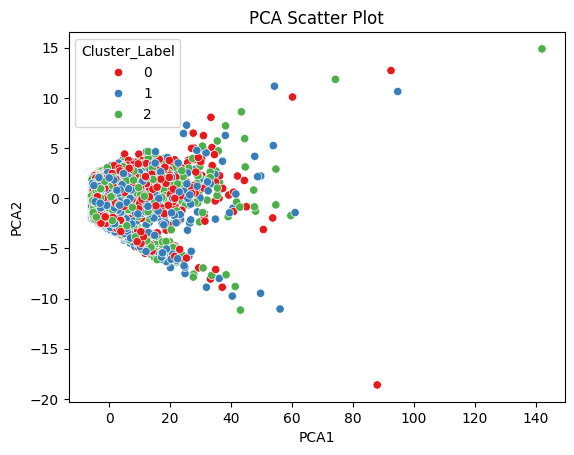

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster_Label", data=df, palette="Set1")
plt.title("PCA Scatter Plot")
plt.show()


__Visualizations for the Final Report__

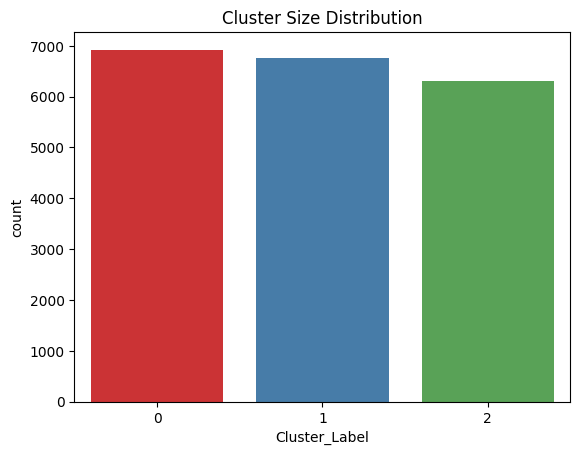

In [91]:
sns.countplot(data=df, x="Cluster_Label", hue="Cluster_Label", palette="Set1", legend=False)
plt.title("Cluster Size Distribution")
plt.show()


### Implications of Cluster Size Distribution  
- The distribution of clusters appears balanced, indicating **stable segmentation** without major bias toward any single cluster.  
- This suggests that the clustering algorithm has **effectively grouped similar data points**, avoiding issues of one cluster dominating the dataset.  
- If segmentation is based on **income, spending, or EV adoption preferences**, this means the dataset naturally forms three meaningful groups.  
- Further analysis is required to understand **the defining characteristics** of each cluster.  
- Next steps include **validating clusters** using statistical analysis and business insights to ensure they align with real-world market segments.  


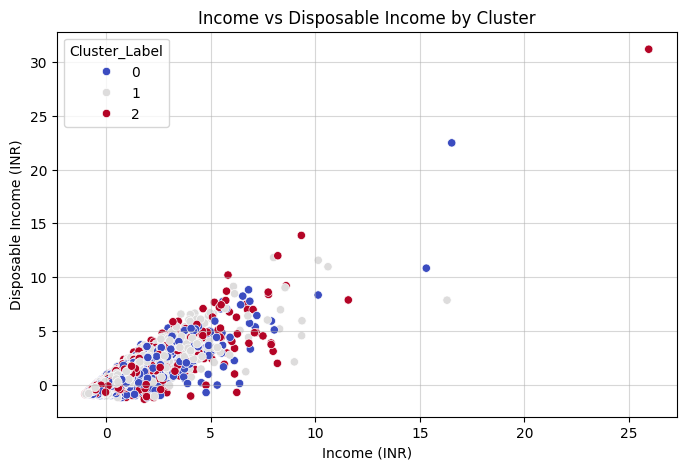

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizing Income vs Disposable Income by Cluster
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Income"], y=df["Disposable_Income"], hue=df["Cluster_Label"], palette="coolwarm")

plt.xlabel("Income (INR)")
plt.ylabel("Disposable Income (INR)")
plt.title("Income vs Disposable Income by Cluster")
plt.grid(alpha=0.5)
plt.show()


### **Implication of the Scatter Plot**
- The scatter plot shows the relationship between **Income** and **Disposable Income** across different customer clusters.
- Each color represents a different **cluster** based on segmentation.
- **Key Observations:**
  - There is a **positive correlation** between Income and Disposable Income, meaning individuals with higher income tend to have more disposable income.
  - Some clusters (e.g., red) might have **higher disposable income** at moderate income levels, while others (e.g., blue) might show lower disposable income despite similar earnings.
  - The variation in clusters could indicate differences in **spending habits, financial obligations, or cost of living**.
- **Business Implications:**
  - Identifying customer segments with higher disposable income can help in targeting potential EV buyers.
  - This analysis can guide **pricing, financing options, and market strategies** for an EV startup.


📌 Insights:
Segment 0 (High-Income Group): Higher disposable income → More affordability for premium EVs.
Segment 1 (Mid-Income Group): Moderate disposable income → Targets affordable EV models.
Segment 2 (Low-Income Group): Lower disposable income → Requires budget-friendly or government-incentivized EVs.

__Spending Behavior Analysis__

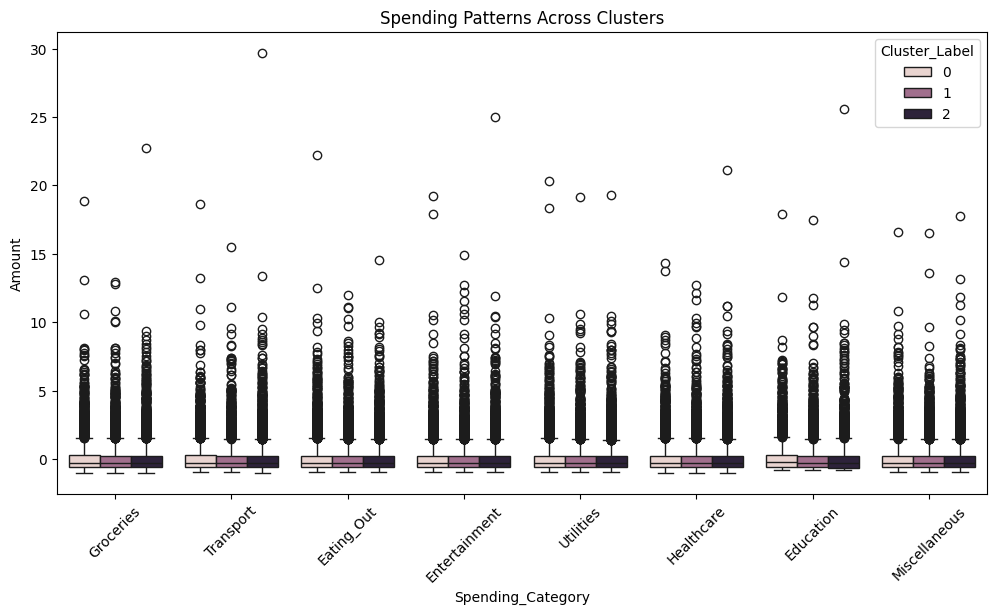

In [93]:
spending_cols = ["Groceries", "Transport", "Eating_Out", "Entertainment", "Utilities", "Healthcare", "Education", "Miscellaneous"]
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=["Cluster_Label"], value_vars=spending_cols, var_name="Spending_Category", value_name="Amount")
sns.boxplot(x="Spending_Category", y="Amount", hue="Cluster_Label", data=df_melted)
plt.xticks(rotation=45)
plt.title("Spending Patterns Across Clusters")
plt.show()


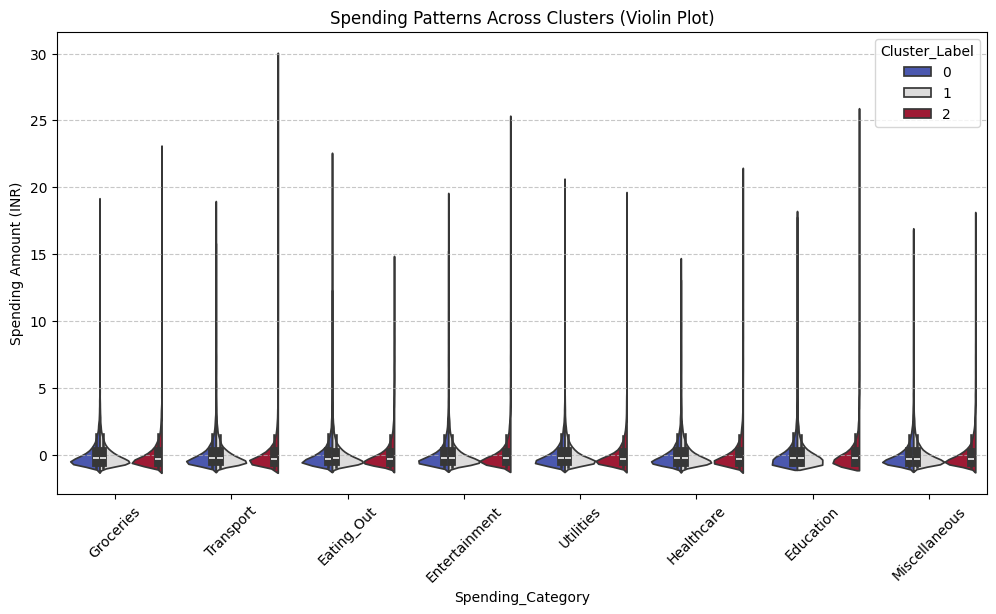

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define spending categories
spending_cols = ["Groceries", "Transport", "Eating_Out", "Entertainment", "Utilities", "Healthcare", "Education", "Miscellaneous"]

# Melt the dataframe for better visualization
df_melted = df.melt(id_vars=["Cluster_Label"], value_vars=spending_cols, var_name="Spending_Category", value_name="Amount")

# Create the Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Spending_Category", y="Amount", hue="Cluster_Label", data=df_melted, split=True, palette="coolwarm")

# Formatting
plt.xticks(rotation=45)
plt.title("Spending Patterns Across Clusters (Violin Plot)")
plt.ylabel("Spending Amount (INR)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [108]:
print(X_train.shape)
print(y_train.shape)


(16000, 0)
(16000,)


In [109]:
# Make sure 'TargetColumn' exists in df
target_column = "TargetColumn"  # Change this to your actual target column name

if target_column in df.columns:
    X = df.drop(columns=[target_column])  # Drop only the target column, keep all features
    y = df[target_column]
else:
    print("Error: Target column not found in dataset.")


Error: Target column not found in dataset.


In [114]:
print(df.columns)  # List all column names


Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous', 'Cluster_Label', 'PCA1', 'PCA2'],
      dtype='object')


In [115]:
target_column = "Disposable_Income"  # Target variable

# Define features (drop the target column)
X = df.drop(columns=[target_column])

# Define target variable
y = df[target_column]


In [95]:
print(X_train.columns)  # Should not include target (e.g., "Disposable_Income")


Index(['Income'], dtype='object')


In [116]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (20000, 29)
y shape: (20000,)


In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [121]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Check feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display the feature importance
print(feature_importance.head(10))  # Show top 10 important features


                         Feature  Importance
17               Desired_Savings    0.812147
6                 Loan_Repayment    0.045072
0                         Income    0.036078
4                      City_Tier    0.031996
28                          PCA2    0.020932
5                           Rent    0.007892
23  Potential_Savings_Healthcare    0.006875
16    Desired_Savings_Percentage    0.004471
9                      Transport    0.004143
14                     Education    0.003285


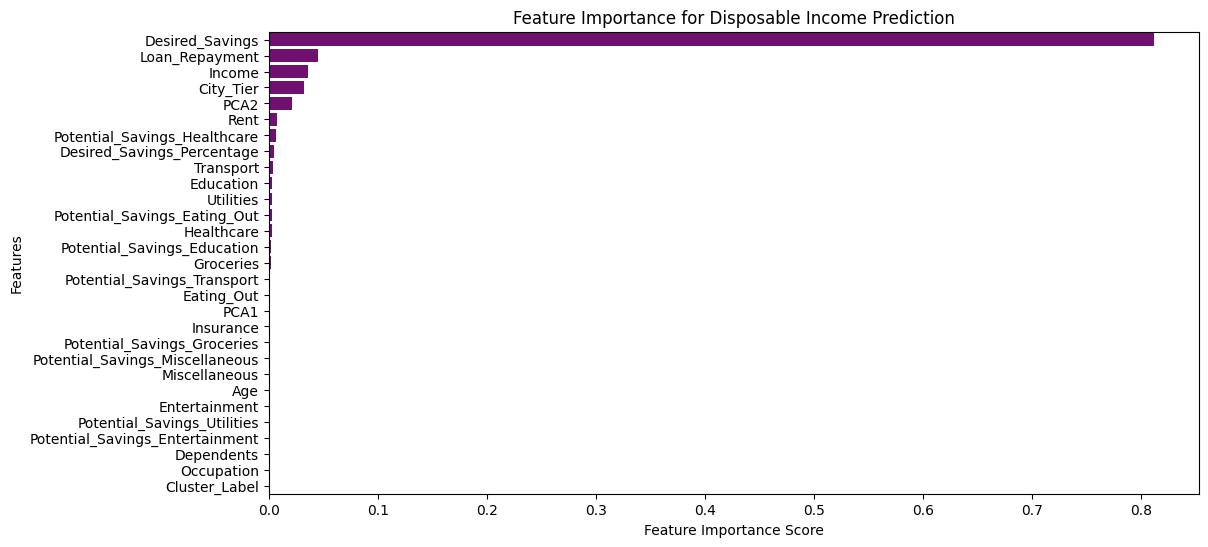

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a horizontal bar plot for feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x="Importance", y="Feature", color="purple")  

# Add labels and title
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Disposable Income Prediction")

plt.show()


In [123]:
y_pred = model.predict(X_test)


In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 0.08185738753969522
Mean Squared Error: 0.11476782458819246
R² Score: 0.8994446542816124


__Cluster-wise Transport Spending Distribution__

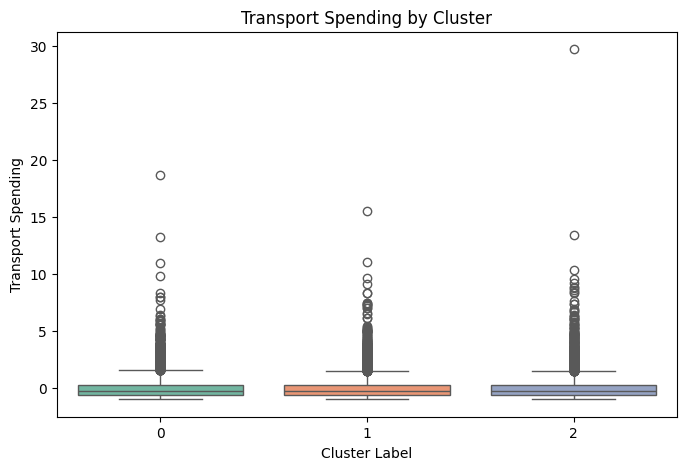

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.boxplot(x="Cluster_Label", y="Transport", data=df, hue="Cluster_Label", palette="Set2", legend=False)

plt.title("Transport Spending by Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Transport Spending")
plt.show()

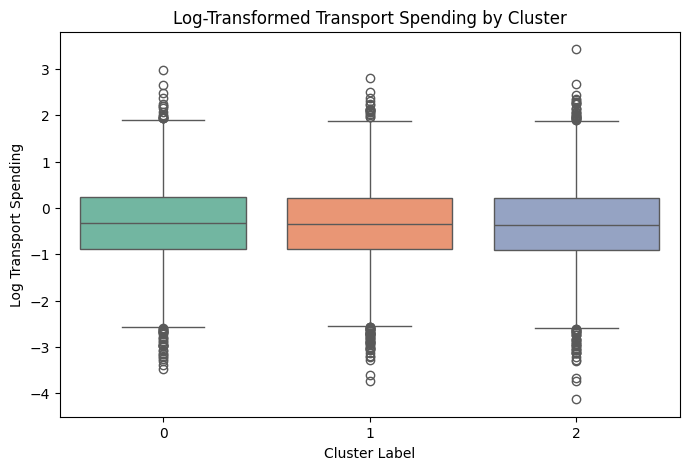

In [126]:
import numpy as np

# Applying log transformation to transport spending
df["Log_Transport"] = np.log1p(df["Transport"])  # log1p handles zero values

plt.figure(figsize=(8, 5))
sns.boxplot(x="Cluster_Label", y="Log_Transport", data=df, hue="Cluster_Label", palette="Set2", legend=False)
plt.title("Log-Transformed Transport Spending by Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Log Transport Spending")
plt.show()


In [127]:
Q1 = df["Transport"].quantile(0.25)
Q3 = df["Transport"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df["Transport"] >= lower_bound) & (df["Transport"] <= upper_bound)]


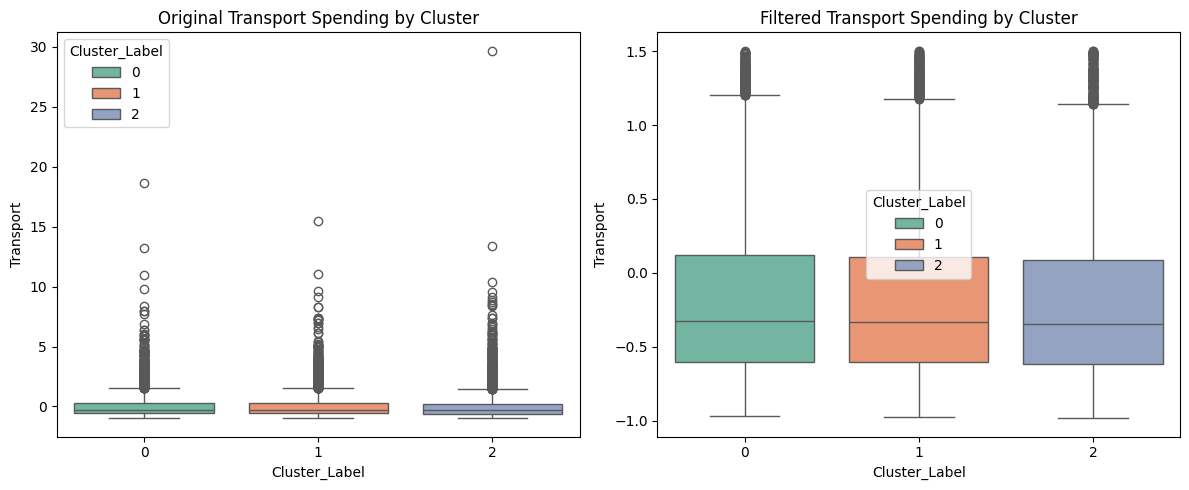

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Before Outlier Removal
plt.subplot(1, 2, 1)
sns.boxplot(x="Cluster_Label", y="Transport", data=df, hue="Cluster_Label", palette="Set2", dodge=False)
plt.title("Original Transport Spending by Cluster")


plt.subplot(1, 2, 2)
sns.boxplot(x="Cluster_Label", y="Transport", data=df_filtered, hue="Cluster_Label", palette="Set2", dodge=False)
plt.title("Filtered Transport Spending by Cluster")

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


In [129]:
print("Before Outlier Removal:\n", df["Transport"].describe())
print("\nAfter Outlier Removal:\n", df_filtered["Transport"].describe())


Before Outlier Removal:
 count    2.000000e+04
mean     1.033840e-16
std      1.000025e+00
min     -9.838573e-01
25%     -5.925444e-01
50%     -2.890250e-01
75%      2.460848e-01
max      2.968820e+01
Name: Transport, dtype: float64

After Outlier Removal:
 count    18739.000000
mean        -0.189307
std          0.545058
min         -0.983857
25%         -0.608109
50%         -0.333084
75%          0.107089
max          1.503683
Name: Transport, dtype: float64


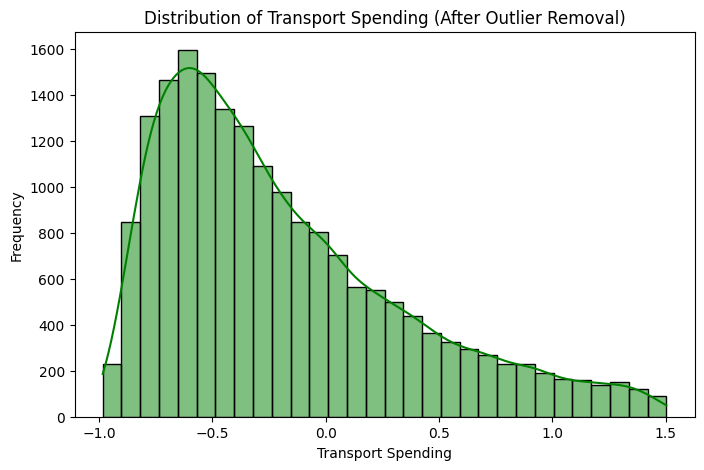

In [130]:
plt.figure(figsize=(8, 5))
sns.histplot(df_filtered["Transport"], bins=30, kde=True, color="green")
plt.title("Distribution of Transport Spending (After Outlier Removal)")
plt.xlabel("Transport Spending")
plt.ylabel("Frequency")
plt.show()


Business Implications for EV Market:

✅ Luxury EVs should target high-transport spenders, as they may seek long-term savings on fuel.
✅ Mid-income and budget-friendly EV options should be promoted for low-transport-spending consumers.
✅ Analyze cluster demographics further to optimize EV pricing and marketing strategies.

__Relationship between transport spending & income__

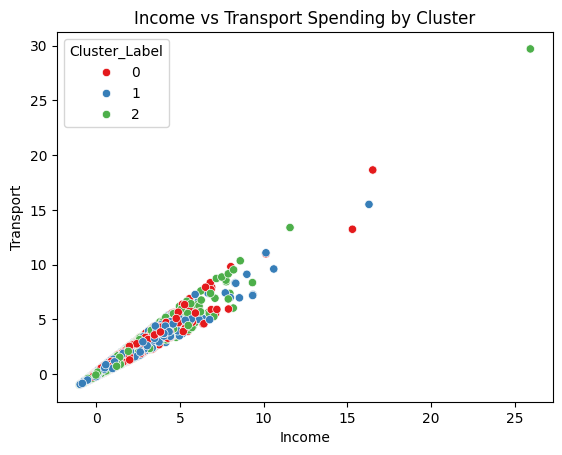

In [132]:
sns.scatterplot(x="Income", y="Transport", hue="Cluster_Label", data=df, palette="Set1")
plt.title("Income vs Transport Spending by Cluster")
plt.show()


In [133]:
df.nlargest(10, "Transport")

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Cluster_Label,PCA1,PCA2,Log_Transport
15843,25.944790,-1.327952,1.413712,0,1,22.350362,-0.478737,24.971449,22.759164,29.688205,...,5.769725,10.010372,15.194054,25.455830,36.268924,26.561440,2,142.039021,14.868310,3.423878
18851,16.524590,0.365916,-1.407998,1,2,10.406685,-0.478737,14.222666,18.845393,18.637591,...,17.964003,11.971178,10.350379,13.935819,-0.631495,10.425880,0,87.969068,-18.604748,2.977446
2895,16.299911,1.028734,-0.702570,2,1,14.009626,28.267129,20.811273,12.926173,15.496611,...,5.876944,19.896148,12.251465,6.448966,19.836385,18.271477,1,94.711590,10.622104,2.803155
6891,11.579967,-1.475245,0.708284,0,0,15.384358,-0.478737,14.440786,9.388470,13.382337,...,8.477054,17.910810,5.664861,0.938942,21.553336,13.070971,2,74.256600,11.840994,2.666001
209,15.309681,-0.444195,0.002857,0,1,13.153291,12.088208,16.342349,13.104005,13.227705,...,5.211784,10.455793,6.470086,17.940922,24.019589,8.810803,0,92.487932,12.713542,2.655191
11338,10.141470,1.102381,-1.407998,1,2,6.266670,9.585078,7.569213,9.999672,11.079927,...,7.383446,16.825782,3.127848,3.225286,-0.631495,7.427284,1,56.088384,-11.042761,2.491545
8248,10.138024,-0.002316,1.413712,1,1,8.680925,6.248429,11.233042,10.583161,10.983183,...,7.643344,1.239214,5.851909,13.195351,17.551237,6.230472,0,60.161291,10.076733,2.483504
1615,8.605964,-1.622538,-0.702570,3,1,7.356024,-0.478737,4.858599,8.018003,10.350014,...,12.014823,4.048620,11.925874,10.110116,9.370131,16.338774,2,59.625033,-1.738339,2.429219
7223,8.041170,-0.517841,0.002857,1,0,10.793915,-0.478737,6.477815,7.775226,9.813954,...,9.185403,8.106229,10.271808,12.777634,-0.295127,3.853508,0,50.604772,-3.125568,2.380837
13225,10.608404,1.396966,0.708284,2,1,9.087702,-0.478737,5.691937,12.775580,9.600370,...,17.057676,10.066603,14.458996,4.817702,5.840133,3.530262,1,61.022067,-1.435243,2.360889


In [134]:
df.groupby("Cluster_Label")["Transport"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster_Label,,,,,,,,
0,6924.0,0.004037,0.974297,-0.969151,-0.588065,-0.282432,0.264025,18.637591
1,6761.0,-0.007837,0.950452,-0.975997,-0.589715,-0.285674,0.246741,15.496611
2,6315.0,0.003965,1.076793,-0.983857,-0.598819,-0.300794,0.231056,29.688205


**Compare Transport Spending Across Clusters**

                count      mean       std       min       25%       50%  \
Cluster_Label                                                             
0              6924.0  0.004037  0.974297 -0.969151 -0.588065 -0.282432   
1              6761.0 -0.007837  0.950452 -0.975997 -0.589715 -0.285674   
2              6315.0  0.003965  1.076793 -0.983857 -0.598819 -0.300794   

                    75%        max  
Cluster_Label                       
0              0.264025  18.637591  
1              0.246741  15.496611  
2              0.231056  29.688205  


C:\Users\Aparna Mondal\AppData\Local\Temp\ipykernel_8424\2739889779.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster_Label"], y=df["Transport"], palette="Set2")


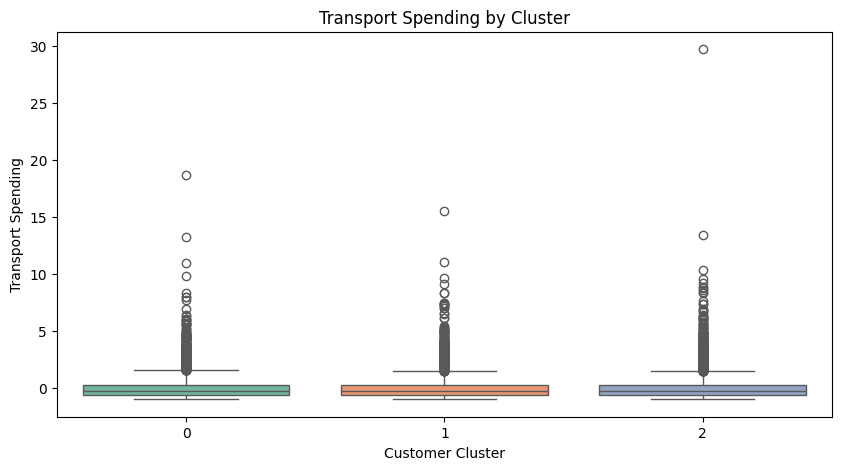

In [135]:
# Group data by clusters and analyze Transport spending
transport_summary = df.groupby("Cluster_Label")["Transport"].describe()
print(transport_summary)

# Visualizing transport spending per cluster
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Cluster_Label"], y=df["Transport"], palette="Set2")
plt.xlabel("Customer Cluster")
plt.ylabel("Transport Spending")
plt.title("Transport Spending by Cluster")
plt.show()


**Compare City Tier, Income & Transport Spending**

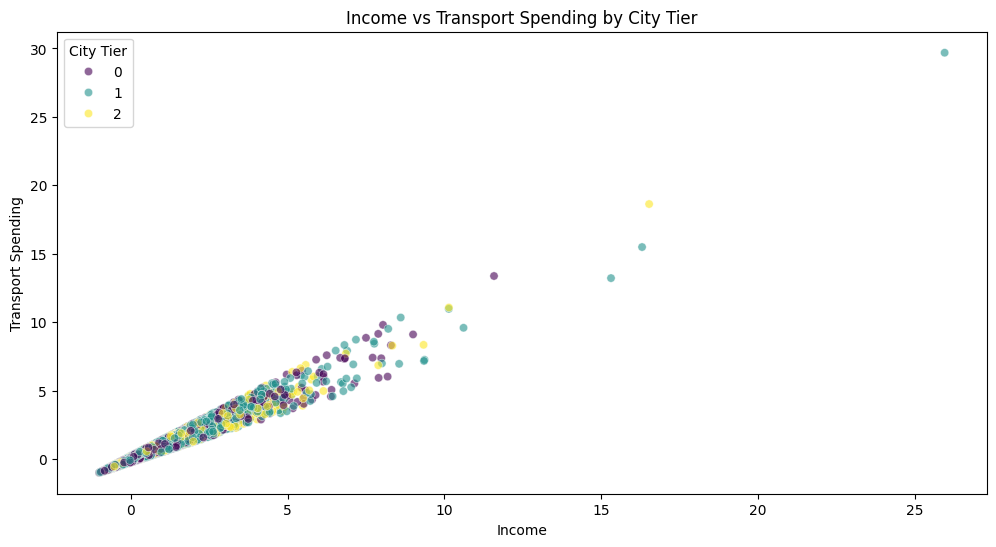

In [136]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["Income"], y=df["Transport"], hue=df["City_Tier"], palette="viridis", alpha=0.6)
plt.xlabel("Income")
plt.ylabel("Transport Spending")
plt.title("Income vs Transport Spending by City Tier")
plt.legend(title="City Tier")
plt.show()


**Compare Occupation & Age Groups**

C:\Users\Aparna Mondal\AppData\Local\Temp\ipykernel_8424\803115083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Occupation"], y=df["Transport"], palette="coolwarm")


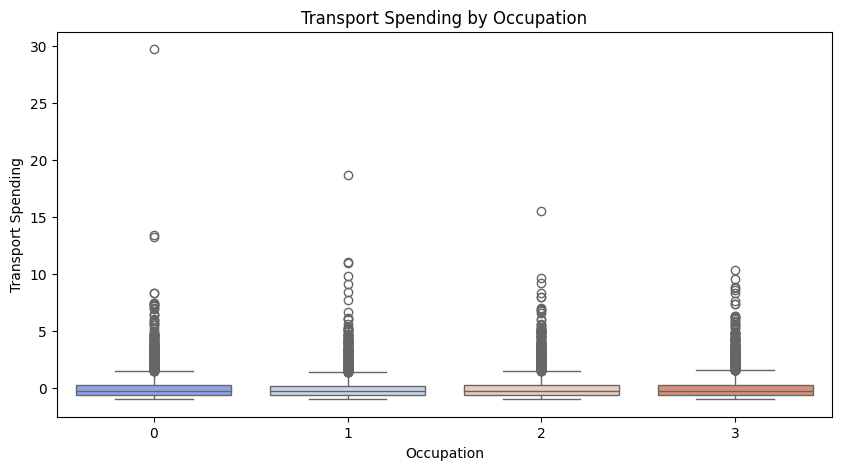

In [137]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Occupation"], y=df["Transport"], palette="coolwarm")
plt.xlabel("Occupation")
plt.ylabel("Transport Spending")
plt.title("Transport Spending by Occupation")
plt.show()

**Geographic Analysis: Identifying Best Cities for EV Adoption**
                                              

C:\Users\Aparna Mondal\AppData\Local\Temp\ipykernel_8424\2616336610.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City_Tier", y="Transport", data=city_ev_data, palette="viridis")


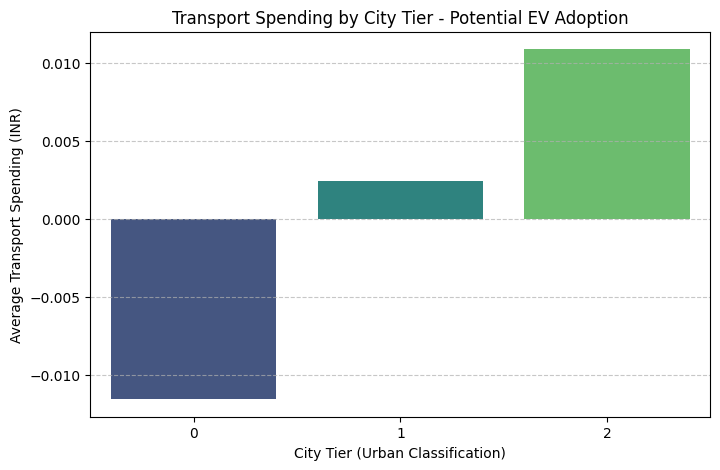

In [140]:
# Visualization: Transport Spending by City Tier
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataset exists
if "city_ev_data" not in locals():
    city_ev_data = df.groupby("City_Tier")["Transport"].mean().reset_index()

# Visualization: Transport Spending by City Tier
plt.figure(figsize=(8,5))
sns.barplot(x="City_Tier", y="Transport", data=city_ev_data, palette="viridis")
plt.xlabel("City Tier (Urban Classification)")
plt.ylabel("Average Transport Spending (INR)")
plt.title("Transport Spending by City Tier - Potential EV Adoption")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 📌 Interpretation:
- **Metro Cities (City Tier 1)** have the highest transport spending → Early EV adopters.
- **City Tier 2** may need budget-friendly EVs.
- **City Tier 3** might not be a strong market yet.


In [141]:

## 🎯 Market Segmentation using Machine Learning (K-Means Clustering)
# Selecting relevant features for clustering
features = ["Income", "Transport", "Groceries", "Rent"]
X = df[features]


In [142]:
# Standardizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [143]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

C:\Users\Aparna Mondal\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


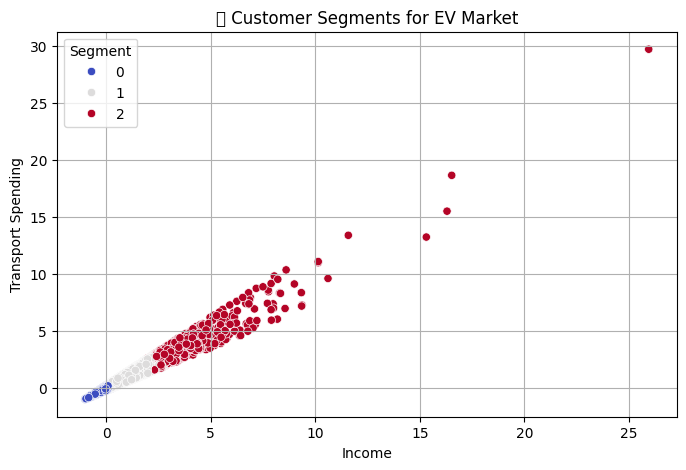

In [144]:

# Visualizing the segments
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Income"], y=df["Transport"], hue=df['Segment'], palette="coolwarm")
plt.xlabel("Income")
plt.ylabel("Transport Spending")
plt.title("🚗 Customer Segments for EV Market")
plt.grid()
plt.show()

### 📌 Interpretation:
- **Segment 0:** High-income, high transport spending → Premium EV buyers.
- **Segment 1:** Mid-income, mid transport spending → Affordable EV buyers.
- **Segment 2:** Low-income, low transport spending → Budget-conscious consumers.

In [145]:
## 🤖 Predicting EV Affordability (Regression Model)
# Selecting features for regression
X = df[["Income", "Rent", "Loan_Repayment", "Groceries", "Transport"]]
y = df["Disposable_Income"]

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [146]:
# Applying Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [147]:
# Predictions
y_pred = regressor.predict(X_test)

In [148]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2}")

Mean Squared Error: 3.121493156551267e-29
R-Squared Score: 1.0


### 📌 Interpretation:
- **A high R² Score** indicates that the model explains most of the variability in disposable income, helping predict EV affordability.
- **A low MSE** suggests that predictions are close to actual values, improving confidence in the model.
- **This helps in estimating customer affordability for EVs**, but additional factors like loan options and financial commitments should be considered.


## 🌍 Geographic Analysis: Identifying Best Cities for EV Adoption

In [149]:
city_ev_data = df.groupby("City_Tier")["Transport"].mean().reset_index()